In [1]:
import intake

In [2]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")

In [4]:
print(list(cat['FESOM']))

['IFS_4.4-FESOM_5-cycle3', 'IFS_28-FESOM_25-cycle3', 'IFS_9-FESOM_5-cycle3', 'FESOM_13_tropo_age_interpolated']


In [5]:
print(list(cat['FESOM']['FESOM_13_tropo_age_interpolated']))

['2D_1h_0.1deg', '3D_1h_0.1deg', '2D_1h_0.5deg', '3D_1h_0.5deg_full', '3D_1h_0.5deg_half']


In [7]:
data = cat['FESOM']['FESOM_13_tropo_age_interpolated']['2D_1h_0.1deg'].to_dask()

In [8]:
data

<xarray.Dataset>
Dimensions:    (time: 2928, depth: 1, lat: 400, lon: 751)
Coordinates:
  * depth      (depth) float64 0.0
  * lat        (lat) float64 -9.95 -9.85 -9.75 -9.65 ... 29.65 29.75 29.85 29.95
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 400, 751), meta=np.ndarray>
  * lon        (lon) float64 -60.0 -59.9 -59.8 -59.7 ... 14.7 14.8 14.9 15.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 400, 751), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-01T02:54:00 ... 2020-12-31T23:54:00
Data variables:
    MLD1       (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
    MLD2       (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
    fh         (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
    ssh        (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
    sss        (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
    sst        (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
    tx_sur     (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
    ty_sur     (time, depth, lat, lon) float32 dask.array<chunksize=(30, 1, 200, 376), meta=np.ndarray>
Attributes: (12/22)
    FESOM_ClimateDataPath:               /work/ab0995/a270206/iage/data/ready...
    FESOM_MeshPath:                      /work/ab0995/a270088/meshes/tropotes...
    FESOM_autorotate_back_to_geo:        -1
    FESOM_evp_rheol_steps:               120
    FESOM_force_rotation:                -1
    FESOM_git_SHA:                       86d8cc19
    ...                                  ...
    FESOM_which_ALE:                     zstar
    box:                                 trop
    data:                                /work/ab0995/a270206/iage/results/fh...
    influence:                           15000.0
    interp:                              mtri_linear
    meshpath:                            /work/ab0995/a270088/meshes/tropotes...

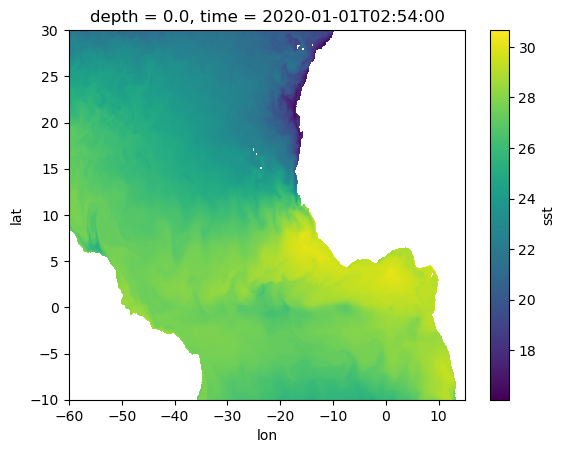

In [9]:
data.sst[0,0,:].plot()

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm

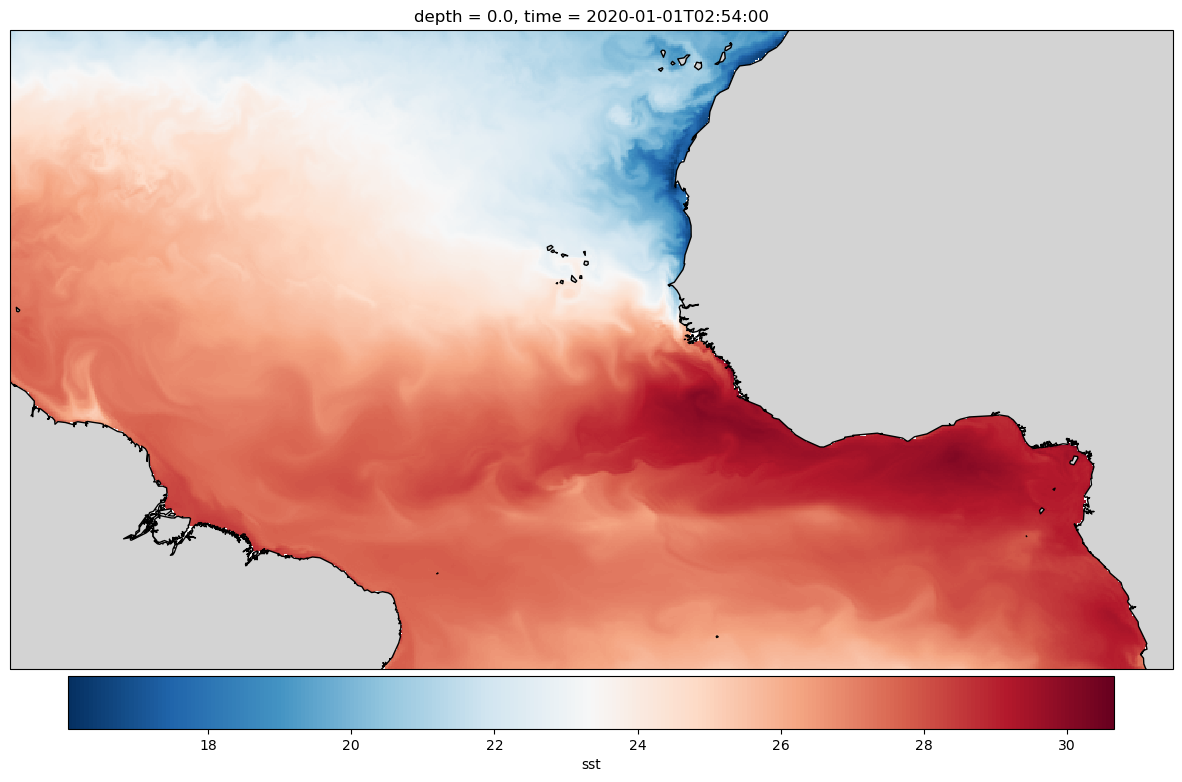

In [17]:
working_projection = getattr(ccrs, "Mercator")()
p = data.sst[0,0,:].plot(subplot_kws=dict(projection=working_projection),
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"shrink": 0.9, "pad": 0.01, "orientation": "horizontal"},
        figsize=(15,10), 
        cmap=cm.RdBu_r)
p.axes.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="low", facecolor="lightgray")
        )